In [8]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import erfinv

# Test 1

In [9]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\Data1.xlsx')
s1 = wb['Sheet1']
t = get_xcel_col(s1, 'A', 11, 57)
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
m_n = m_e / np.array(s1['D11'].value)
V_e = 1 - m_n
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    return(r_e)
V_in = 0.63
A = 3000000000
E = 200000
σ = 12500 
def r_m(t,A,E,V_in,σ):
    # initialize three arrays
    dt2 = np.zeros(len(t)-1)
    dV_o = np.zeros(len(t)-1)
    r_m = np.zeros(len(t)-1)
    Z = np.zeros(len(t)-1)
    # fill in dt2 array 
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    # set up initial value of arrays
    dV_o[0] = 0
    Z[0] = erfinv(1-2*(V_in-dV_o[0]))
    r_m[0] = A*np.exp((-E-σ*Z[0])/R/T[0])*(V_in-dV_o[0])

    # fill in other two arrays
    for i in range(1, len(t)-1):
        dV_o[i] = dV_o[i-1]+r_m[i-1]*dt2[i]
        Z[i] = erfinv(1-2*(V_in-dV_o[i]))
        r_m[i] = A*np.exp((-E-σ*Z[i])/R/T[i])*(V_in-dV_o[i])
    return(r_m, dV_o)
def f(X):
    A,E,V_in,σ = X
    #z = r_e(V_e, t) - r_m(t,A,E,V_in)[0]
    e1 = (V_e[0:-1] - r_m(t,A,E,V_in,σ)[1])**2
    e2 = (r_e(V_e, t) - r_m(t,A,E,V_in,σ)[0])**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A,E,V_in,σ))
A,E,V_in,σ = res.x
print(A)
print(E)
print(V_in)
print(σ)


e1 = (V_e[0:-1] - r_m(t,A,E,V_in,σ)[1])**2
e2 = (r_e(V_e, t) - r_m(t,A,E,V_in,σ)[0])**2


C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


3000000000.0
199999.99365234375
204.9649609375
12500.001403808594


C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


# Test 2

In [5]:
t2 = get_xcel_col(s1, 'O', 11, 56)
T_c2 = get_xcel_col(s1, 'P', 11, 56)
T2 = T_c2 + np.array(273.15)
m_e2 = get_xcel_col(s1, 'R', 11, 56)
m_n2 = m_e2 / np.array(s1['R11'].value)
V_e2 = 1 - m_n2
def r_e2(V_e2, t2):
    dV_e2 = []
    dt1_2 = []
    for i in range(1, len(V_e2)):
        dV_e2.append(V_e2[i] - V_e2[i-1])
    for i in range(1, len(t2)):
        dt1_2.append(t2[i] - t2[i-1])
    dV_e2 = np.array(dV_e2)
    dt1_2 = np.array(dt1_2)
    r_e2 = dV_e2 / dt1_2
    return(r_e2)
V_in2 = 0.645035021006702
A2 = 16624.8724494439
E2 = 76623.6728936998
ν2 = 10
σ2 = 10 
def r_m2(t2,A2,E2,V_in2,ν2,σ2):
    # initialize three arrays
    dt2_2 = np.zeros(len(t2)-1)
    dV_o2 = np.zeros(len(t2)-1)
    r_m2 = np.zeros(len(t2)-1)
    Z2 = np.zeros(len(t2)-1)
    # fill in dt2 array 
    for i in range(1, len(t2)-1):
        dt2_2[i] = t2[i] - t2[i-1] 
        
    # set up initial value of arrays
    dV_o2[0] = 0
    Z2[0] = ν2*(1-2*(V_in2-dV_o2[0]))
    r_m2[0] = A2*np.exp((-E2-σ2*Z2[0])/R/T2[0])*(V_in2-dV_o2[0])

    # fill in other two arrays
    for i in range(1, len(t2)-1):
        dV_o2[i] = dV_o2[i-1]+r_m2[i-1]*dt2_2[i]
        Z2[i] = ν2*(1-2*(V_in2-dV_o2[i]))
        r_m2[i] = A2*np.exp((-E2-σ2*Z2[i])/R/T2[i])*(V_in2-dV_o2[i])
    return(r_m2, dV_o2)
def f2(X2):
    A2,E2,V_in2,ν2,σ2 = X2
    #z = r_e(V_e, t) - r_m(t,A,E,V_in)[0]
    e1_2 = (V_e2[0:-1] - r_m2(t2,A2,E2,V_in2,ν2,σ2)[1])**2
    e2_2 = (r_e2(V_e2, t2) - r_m2(t2,A2,E2,V_in2,ν2,σ2)[0])**2
    return(sum(e1_2) + sum(e2_2))

res = minimize(f2,(A2,E2,V_in2,ν2,σ2))
A2,E2,V_in2,ν2,σ2 = res.x
print(A2)
print(E2)
print(V_in2)
print(ν2)
print(σ2)


e1_2 = (V_e2[0:-1] - r_m2(t2,A2,E2,V_in2,ν2,σ2)[1])**2
e2_2 = (r_e2(V_e2, t2) - r_m2(t2,A2,E2,V_in2,ν2,σ2)[0])**2

16726.566707815473
76266.22867289517
0.6623684137726262
60.793127118729814
60.79312929491771


# Test 3

In [6]:
t3 = get_xcel_col(s1, 'AD', 11, 55)
T_c3 = get_xcel_col(s1, 'AE', 11, 55)
T3 = T_c3 + np.array(273.15)
m_e3 = get_xcel_col(s1, 'AG', 11, 55)
m_n3 = m_e3 / np.array(s1['AG11'].value)
V_e3 = 1 - m_n3
def r_e3(V_e3, t3):
    dV_e3 = []
    dt1_3 = []
    for i in range(1, len(V_e3)):
        dV_e3.append(V_e3[i] - V_e3[i-1])
    for i in range(1, len(t3)):
        dt1_3.append(t3[i] - t3[i-1])
    dV_e3 = np.array(dV_e3)
    dt1_3 = np.array(dt1_3)
    r_e3 = dV_e3 / dt1_3
    return(r_e3)
V_in3 = 0.645
A3 = 16624.9
E3 = 76623.7
ν3 = 10
σ3 = 10 
def r_m3(t3,A3,E3,V_in3,ν3,σ3):
    # initialize three arrays
    dt2_3 = np.zeros(len(t3)-1)
    dV_o3 = np.zeros(len(t3)-1)
    r_m3 = np.zeros(len(t3)-1)
    Z3 = np.zeros(len(t3)-1)
    # fill in dt2 array 
    for i in range(1, len(t3)-1):
        dt2_3[i] = t3[i] - t3[i-1] 
        
    # set up initial value of arrays
    dV_o3[0] = 0
    Z3[0] = ν3*(1-2*(V_in3-dV_o3[0]))
    r_m3[0] = A3*np.exp((-E3-σ3*Z3[0])/R/T3[0])*(V_in3-dV_o3[0])

    # fill in other two arrays
    for i in range(1, len(t3)-1):
        dV_o3[i] = dV_o3[i-1]+r_m3[i-1]*dt2_3[i]
        Z3[i] = ν3*(1-2*(V_in3-dV_o3[i]))
        r_m3[i] = A3*np.exp((-E3-σ3*Z3[i])/R/T3[i])*(V_in3-dV_o3[i])
    return(r_m3, dV_o3)
def f3(X3):
    A3,E3,V_in3,ν3,σ3 = X3
    #z = r_e(V_e, t) - r_m(t,A,E,V_in)[0]
    e1_3 = (V_e3[0:-1] - r_m3(t3,A3,E3,V_in3,ν3,σ3)[1])**2
    e2_3 = (r_e3(V_e3, t3) - r_m3(t3,A3,E3,V_in3,ν3,σ3)[0])**2
    return(sum(e1_3) + sum(e2_3))

res = minimize(f3,(A3,E3,V_in3,ν3,σ3))
A3,E3,V_in3,ν3,σ3 = res.x
print(A3)
print(E3)
print(V_in3)
print(ν3)
print(σ3)


e1_3 = (V_e3[0:-1] - r_m3(t3,A3,E3,V_in3,ν3,σ3)[1])**2
e2_3 = (r_e3(V_e3, t3) - r_m3(t3,A3,E3,V_in3,ν3,σ3)[0])**2

17020.505433975984
75287.05186568506
0.6613376548127303
57.5205164477523
57.52051319363791


# Total Values

In [45]:
V_inT = 0.645
AT = 16624.9
ET = 76623.7
νT = 10
σT = 10 

def totf(XT):
    AT,ET,V_inT,νT,σT = XT
    e1 = (V_e[0:-1] - r_m(t,A,E,V_in,ν,σ)[1])**2
    e2 = (r_e(V_e, t) - r_m(t,A,E,V_in,ν,σ)[0])**2
    e1_2 = (V_e2[0:-1] - r_m2(t2,A2,E2,V_in2,ν2,σ2)[1])**2
    e2_2 = (r_e2(V_e2, t2) - r_m2(t2,A2,E2,V_in2,ν2,σ2)[0])**2
    e1_3 = (V_e3[0:-1] - r_m3(t3,A3,E3,V_in3,ν3,σ3)[1])**2
    e2_3 = (r_e3(V_e3, t3) - r_m3(t3,A3,E3,V_in3,ν3,σ3)[0])**2
    return(sum(e1) + sum(e2) + sum(e1_2) + sum(e2_2) + sum(e1_3) + sum(e2_3))
res = minimize(totf,(AT,ET,V_inT,νT,σT))
AT,ET,V_inT,νT,σT = res.x
print(AT)
print(ET)
print(V_inT)
print(νT)
print(σT)
print(sum(e1) + sum(e2) + sum(e1_2) + sum(e2_2) + sum(e1_3) + sum(e2_3))

16624.9
76623.7
0.645
10.0
10.0
0.01848875235229377


C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


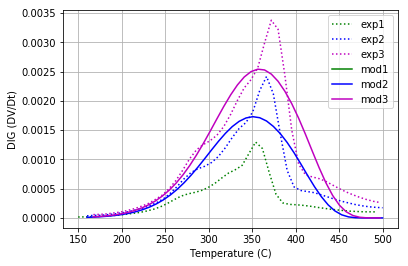

In [10]:
plt.plot(T_c[0:45],r_e(V_e,t),linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c2[0:44],r_e2(V_e2,t2),linestyle = ':',color = 'Blue',label='exp2')
plt.plot(T_c3[0:43],r_e3(V_e3,t3),linestyle = ':',color = 'M',label='exp3')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.plot(T_c[0:45],r_m(t,A,E,V_in,σ)[0],color = 'Green',label='mod1')
plt.plot(T_c2[0:44],r_m2(t2,A2,E2,V_in2,ν2,σ2)[0],color = 'Blue',label='mod2')
plt.plot(T_c3[0:43],r_m3(t3,A3,E3,V_in3,ν3,σ3)[0],color = 'M',label='mod3')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

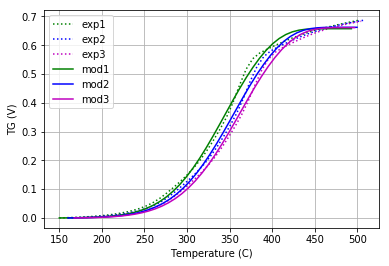

In [44]:
plt.plot(T_c,V_e,linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c2,V_e2,linestyle = ':',color = 'Blue',label='exp2')
plt.plot(T_c3,V_e3,linestyle = ':',color = 'M',label='exp3')
plt.xlabel('Temperature (C)')
plt.ylabel('TG (V)')
plt.plot(T_c[0:45],r_m(t,A,E,V_in,ν,σ)[1],'g-',label='mod1')
plt.plot(T_c2[0:44],r_m2(t2,A2,E2,V_in2,ν2,σ2)[1],'b-',label='mod2')
plt.plot(T_c3[0:43],r_m3(t3,A3,E3,V_in3,ν3,σ3)[1],'m-',label='mod3')
plt.xlabel('Temperature (C)')
plt.ylabel('TG (V)')
plt.legend()
plt.grid()